In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import jax as jax
from glob import glob
import scipy.io
from scipy.interpolate import griddata
# from pyDOE import lhs
import time
import cno_rhs as cno

/global/homes/u/umnty/.local/lib/python3.7/site-packages/pynucastro/rates/rate.py:45: NumbaDeprecationWarning: The 'numba.jitclass' decorator has moved to 'numba.experimental.jitclass' to better reflect the experimental nature of the functionality. Please update your imports to accommodate this change and see http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#change-of-jitclass-location for the time frame.
  @numba.jitclass(Tfactor_spec)


In [2]:
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# import tensorflow_probability as tfp

In [3]:
# tf.enable_eager_execution() 

In [4]:
DataString=glob('IntitialTemperatures*')[0]
Data=pd.read_csv(DataString)

In [5]:
Data

,ip,ihe4,ic12,ic13,in13,in14,in15,io14,io15,t,rho,T
0,0.700000,0.280000,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,10000.0,100000000.0
1,0.697310,0.280005,9.337472e-06,1.771361e-05,8.616025e-03,3.111906e-03,4.179044e-09,0.010673,0.000257,45.635694,10000.0,100000000.0
2,0.696767,0.280055,2.882826e-05,6.353119e-06,3.095746e-03,7.413068e-03,1.587540e-08,0.011313,0.001321,91.271388,10000.0,100000000.0
3,0.696392,0.280199,6.645826e-05,2.753478e-06,1.358929e-03,1.015270e-02,3.544548e-08,0.008956,0.002872,136.907082,10000.0,100000000.0
4,0.696010,0.280453,1.061269e-04,1.938518e-06,9.761711e-04,1.132629e-02,5.555746e-08,0.006671,0.004456,182.542776,10000.0,100000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
100995,0.696667,0.280000,-7.142544e-10,4.180724e-22,1.978631e-13,2.157540e-09,8.927607e-10,0.023332,0.000001,0.005238,10000.0,500000000.0
100996,0.696667,0.280000,-1.432060e-10,4.225411e-22,1.264855e-13,2.157539e-09,1.790343e-10,0.023332,0.000001,0.005292,10000.0,500000000.0
100997,0.696667,0.280000,7.999843e-10,4.270516e-22,7.857170e-15,2.157538e-09,-9.998149e-10,0.023332,0.000001,0.005347,10000.0,500000000.0
100998,0.696667,0.280000,-3.053800e-10,4.313315e-22,1.493329e-13,2.157537e-09,3.817290e-10,0.023332,0.000001,0.005401,10000.0,500000000.0


In [6]:
j=0
AMU = cno.A[:]
for i in AMU:
    Data[Data.keys()[j]]=Data[Data.keys()[j]]/i
    j+=1
Data

,ip,ihe4,ic12,ic13,in13,in14,in15,io14,io15,t,rho,T
0,0.700000,0.070000,1.666667e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,10000.0,100000000.0
1,0.697310,0.070001,7.781227e-07,1.362585e-06,6.627712e-04,2.222790e-04,2.786029e-10,0.000762,1.712750e-05,45.635694,10000.0,100000000.0
2,0.696767,0.070014,2.402355e-06,4.887015e-07,2.381343e-04,5.295049e-04,1.058360e-09,0.000808,8.805152e-05,91.271388,10000.0,100000000.0
3,0.696392,0.070050,5.538188e-06,2.118060e-07,1.045330e-04,7.251931e-04,2.363032e-09,0.000640,1.914562e-04,136.907082,10000.0,100000000.0
4,0.696010,0.070113,8.843911e-06,1.491167e-07,7.509008e-05,8.090209e-04,3.703830e-09,0.000477,2.970433e-04,182.542776,10000.0,100000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
100995,0.696667,0.070000,-5.952120e-11,3.215942e-23,1.522024e-14,1.541100e-10,5.951738e-11,0.001667,8.519224e-08,0.005238,10000.0,500000000.0
100996,0.696667,0.070000,-1.193383e-11,3.250316e-23,9.729652e-15,1.541099e-10,1.193562e-11,0.001667,8.608491e-08,0.005292,10000.0,500000000.0
100997,0.696667,0.070000,6.666536e-11,3.285012e-23,6.043977e-16,1.541098e-10,-6.665433e-11,0.001667,8.697757e-08,0.005347,10000.0,500000000.0
100998,0.696667,0.070000,-2.544833e-11,3.317935e-23,1.148714e-14,1.541098e-10,2.544860e-11,0.001667,8.787024e-08,0.005401,10000.0,500000000.0


In [7]:
TrajectoryLength=len(Data[Data['T']==1.e8])
TrajectoryLength

101

In [8]:
NPlus1Data=Data[Data.index%TrajectoryLength!=0].copy().reset_index().drop('index',axis=1)
NData=Data[Data.index%TrajectoryLength!=(TrajectoryLength-1)].copy().reset_index().drop('index',axis=1)

In [9]:
# NData.t=NPlus1Data.t-NData.t
NPlus1Data.t-NData.t

0        45.635694
1        45.635694
2        45.635694
3        45.635694
4        45.635694
           ...    
99995     0.000055
99996     0.000055
99997     0.000055
99998     0.000055
99999     0.000055
Name: t, Length: 100000, dtype: float64

In [10]:
NPlus1Data=NPlus1Data.iloc[:,0:len(AMU)].copy()
NPlus1Data.rename(columns=lambda x: x+'t+1', inplace=True)
NPlus1Data

,ipt+1,ihe4t+1,ic12t+1,ic13t+1,in13t+1,in14t+1,in15t+1,io14t+1,io15t+1
0,0.697310,0.070001,7.781227e-07,1.362585e-06,6.627712e-04,2.222790e-04,2.786029e-10,0.000762,1.712750e-05
1,0.696767,0.070014,2.402355e-06,4.887015e-07,2.381343e-04,5.295049e-04,1.058360e-09,0.000808,8.805152e-05
2,0.696392,0.070050,5.538188e-06,2.118060e-07,1.045330e-04,7.251931e-04,2.363032e-09,0.000640,1.914562e-04
3,0.696010,0.070113,8.843911e-06,1.491167e-07,7.509008e-05,8.090209e-04,3.703830e-09,0.000477,2.970433e-04
4,0.695575,0.070202,1.170718e-05,1.589671e-07,8.072409e-05,8.210806e-04,4.784419e-09,0.000366,3.866765e-04
...,...,...,...,...,...,...,...,...,...
99995,0.696667,0.070000,-5.952120e-11,3.215942e-23,1.522024e-14,1.541100e-10,5.951738e-11,0.001667,8.519224e-08
99996,0.696667,0.070000,-1.193383e-11,3.250316e-23,9.729652e-15,1.541099e-10,1.193562e-11,0.001667,8.608491e-08
99997,0.696667,0.070000,6.666536e-11,3.285012e-23,6.043977e-16,1.541098e-10,-6.665433e-11,0.001667,8.697757e-08
99998,0.696667,0.070000,-2.544833e-11,3.317935e-23,1.148714e-14,1.541098e-10,2.544860e-11,0.001667,8.787024e-08


In [11]:
Data=pd.concat([NData,NPlus1Data],axis=1)
Data

,ip,ihe4,ic12,ic13,in13,in14,in15,io14,io15,t,...,T,ipt+1,ihe4t+1,ic12t+1,ic13t+1,in13t+1,in14t+1,in15t+1,io14t+1,io15t+1
0,0.700000,0.070000,1.666667e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,...,100000000.0,0.697310,0.070001,7.781227e-07,1.362585e-06,6.627712e-04,2.222790e-04,2.786029e-10,0.000762,1.712750e-05
1,0.697310,0.070001,7.781227e-07,1.362585e-06,6.627712e-04,2.222790e-04,2.786029e-10,0.000762,1.712750e-05,45.635694,...,100000000.0,0.696767,0.070014,2.402355e-06,4.887015e-07,2.381343e-04,5.295049e-04,1.058360e-09,0.000808,8.805152e-05
2,0.696767,0.070014,2.402355e-06,4.887015e-07,2.381343e-04,5.295049e-04,1.058360e-09,0.000808,8.805152e-05,91.271388,...,100000000.0,0.696392,0.070050,5.538188e-06,2.118060e-07,1.045330e-04,7.251931e-04,2.363032e-09,0.000640,1.914562e-04
3,0.696392,0.070050,5.538188e-06,2.118060e-07,1.045330e-04,7.251931e-04,2.363032e-09,0.000640,1.914562e-04,136.907082,...,100000000.0,0.696010,0.070113,8.843911e-06,1.491167e-07,7.509008e-05,8.090209e-04,3.703830e-09,0.000477,2.970433e-04
4,0.696010,0.070113,8.843911e-06,1.491167e-07,7.509008e-05,8.090209e-04,3.703830e-09,0.000477,2.970433e-04,182.542776,...,100000000.0,0.695575,0.070202,1.170718e-05,1.589671e-07,8.072409e-05,8.210806e-04,4.784419e-09,0.000366,3.866765e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.696667,0.070000,8.204011e-11,3.183533e-23,-1.457899e-15,1.541101e-10,-8.202737e-11,0.001667,8.429958e-08,0.005183,...,500000000.0,0.696667,0.070000,-5.952120e-11,3.215942e-23,1.522024e-14,1.541100e-10,5.951738e-11,0.001667,8.519224e-08
99996,0.696667,0.070000,-5.952120e-11,3.215942e-23,1.522024e-14,1.541100e-10,5.951738e-11,0.001667,8.519224e-08,0.005238,...,500000000.0,0.696667,0.070000,-1.193383e-11,3.250316e-23,9.729652e-15,1.541099e-10,1.193562e-11,0.001667,8.608491e-08
99997,0.696667,0.070000,-1.193383e-11,3.250316e-23,9.729652e-15,1.541099e-10,1.193562e-11,0.001667,8.608491e-08,0.005292,...,500000000.0,0.696667,0.070000,6.666536e-11,3.285012e-23,6.043977e-16,1.541098e-10,-6.665433e-11,0.001667,8.697757e-08
99998,0.696667,0.070000,6.666536e-11,3.285012e-23,6.043977e-16,1.541098e-10,-6.665433e-11,0.001667,8.697757e-08,0.005347,...,500000000.0,0.696667,0.070000,-2.544833e-11,3.317935e-23,1.148714e-14,1.541098e-10,2.544860e-11,0.001667,8.787024e-08


In [12]:
Temperatures = Data['T'].unique()
TemperaturesTrainning=np.random.choice(Temperatures,size=int(len(Temperatures)*.80),replace=False)
np.size(TemperaturesTrainning)

800

In [13]:
TrainnigData=Data[Data['T'].isin(TemperaturesTrainning)].iloc[0:4000,:].copy()
TestingData=Data[~Data['T'].isin(TemperaturesTrainning)].copy()

In [14]:
TrainingSpecies=TrainnigData.iloc[:,0:len(AMU)+3].copy()
ActualSpecies=TrainnigData.iloc[:,len(AMU)+3:].copy()

In [15]:
TrainingSpeciesX=TrainingSpecies.drop('t',axis=1).copy()
TrainingSpeciest=TrainingSpecies.values[:,-3:-2].copy()
np.shape(TrainingSpeciest)
# TrainingSpeciest=np.shape(np.reshape(TrainingSpeciest.values, (-1,1)))

(4000, 1)

In [16]:
class NuclearPhysicsInformedNN:
    # Initialize the class
    def __init__(self, layers, TrainingSpecies, ActualSpecies, RHS):
        
        #X0 = np.concatenate((x0, 0*x0), 1) # (x0, 0)
        
        self.X=TrainingSpecies.drop(['t','rho'],axis=1).copy().values
        self.t=TrainingSpecies.values[:,-3:-2].copy()
        print(np.shape(self.t))
        self.XActual=ActualSpecies.values
        self.rho=TrainingSpecies.values[:,-2:-1].copy()
        
        self.PActual = self.XActual[:,0:1]
        self.He4Actual = self.XActual[:,1:2]
        self.C12Actual = self.XActual[:,2:3]
        self.C13Actual = self.XActual[:,3:4]
        self.N13Actual = self.XActual[:,4:5]
        self.N14Actual = self.XActual[:,5:6]
        self.N15Actual = self.XActual[:,6:7]
        self.O14Actual = self.XActual[:,7:8]
        self.O15Actual = self.XActual[:,8:9]
                
        # Initialize NNs
        self.layers = layers
        self.weights, self.biases = self.initialize_NN(layers)
        
        # tf Placeholders        
        self.XTraining = tf.placeholder(tf.float64, shape=[None,self.X.shape[1]])
        self.tTraining = tf.placeholder(tf.float64, shape=[None,self.t.shape[1]])
        self.rhoParameter = tf.placeholder(tf.float64, shape=[None,self.rho.shape[1]])
        self.x0_tf = tf.placeholder(tf.float64, shape=[None, self.PActual.shape[1]])
        self.x1_tf = tf.placeholder(tf.float64, shape=[None, self.He4Actual.shape[1]])
        self.x2_tf = tf.placeholder(tf.float64, shape=[None, self.C12Actual.shape[1]])
        self.x3_tf = tf.placeholder(tf.float64, shape=[None, self.C13Actual.shape[1]])
        self.x4_tf = tf.placeholder(tf.float64, shape=[None, self.N13Actual.shape[1]])
        self.x5_tf = tf.placeholder(tf.float64, shape=[None, self.N14Actual.shape[1]])
        self.x6_tf = tf.placeholder(tf.float64, shape=[None, self.N15Actual.shape[1]])
        self.x7_tf = tf.placeholder(tf.float64, shape=[None, self.O14Actual.shape[1]])
        self.x8_tf = tf.placeholder(tf.float64, shape=[None, self.O15Actual.shape[1]])
        
        if RHS=='Predictions':
            
            self.PPred,self.PSysPred,self.He4Pred,self.He4SysPred,self.C12Pred,self.C12SysPred,self.C13Pred,\
            self.C13SysPred,self.N13Pred,self.N13SysPred,self.N14Pred,self.N14SysPred,self.N15Pred,\
            self.N15SysPred,self.O14Pred,self.O14SysPred,self.O15Pred,\
            self.O15SysPred=self.NetRHSPredictions(self.XTraining,self.tTraining,self.rhoParameter)
        
        elif RHS=='Actual':
            
            self.PPred,self.PSysPred,self.He4Pred,self.He4SysPred,self.C12Pred,self.C12SysPred,self.C13Pred,\
            self.C13SysPred,self.N13Pred,self.N13SysPred,self.N14Pred,self.N14SysPred,self.N15Pred,\
            self.N15SysPred,self.O14Pred,self.O14SysPred,self.O15Pred,\
            self.O15SysPred=self.NetRHSActual(self.XTraining,self.tTraining,self.rhoParameter,self.x0_tf,self.x1_tf,self.x2_tf,self.x3_tf,self.x4_tf,
                                             self.x5_tf,self.x6_tf,self.x7_tf,self.x8_tf)
        
        # Loss
        AMU=cno.A
        self.loss=tf.reduce_mean(tf.square(self.PPred-self.x0_tf)) + \
                  tf.reduce_mean(tf.square(self.He4Pred-self.x1_tf)) + \
                  tf.reduce_mean(tf.square(self.C12Pred-self.x2_tf)) + \
                  tf.reduce_mean(tf.square(self.C13Pred-self.x3_tf)) + \
                  tf.reduce_mean(tf.square(self.N13Pred-self.x4_tf)) + \
                  tf.reduce_mean(tf.square(self.N14Pred-self.x5_tf)) + \
                  tf.reduce_mean(tf.square(self.N15Pred-self.x6_tf)) + \
                  tf.reduce_mean(tf.square(self.O14Pred-self.x7_tf)) + \
                  tf.reduce_mean(tf.square(self.O15Pred-self.x8_tf)) + \
                  tf.reduce_mean(tf.square(self.PPred*AMU[0]+self.He4Pred*AMU[1]+self.C12Pred*AMU[2]+
                                           self.C13Pred*AMU[3]+self.N13Pred*AMU[4]+self.N14Pred*AMU[5]+
                                           self.N15Pred*AMU[6]+self.O14Pred*AMU[7]+self.O15Pred*AMU[8]
                                           -1)) + \
                  tf.reduce_mean(tf.square(self.PSysPred)) + \
                  tf.reduce_mean(tf.square(self.He4SysPred)) + \
                  tf.reduce_mean(tf.square(self.C12SysPred)) + \
                  tf.reduce_mean(tf.square(self.C13SysPred)) + \
                  tf.reduce_mean(tf.square(self.N13SysPred)) + \
                  tf.reduce_mean(tf.square(self.N14SysPred)) + \
                  tf.reduce_mean(tf.square(self.N15SysPred)) + \
                  tf.reduce_mean(tf.square(self.O14SysPred)) + \
                  tf.reduce_mean(tf.square(self.O15SysPred))
        
        # Optimizers
        self.optimizer = tf.contrib.opt.ScipyOptimizerInterface(self.loss, 
                                                                method = 'L-BFGS-B', 
                                                                options = {'maxiter': 50000,
                                                                           'maxfun': 50000,
                                                                           'maxcor': 50,
                                                                           'maxls': 50,
                                                                           'ftol' :  1.0 *\
                                                                           np.finfo(float).eps})
#         self.optimizer = tf.keras.optimizers.SGD(
#     learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD')

    
        
        self.optimizer_Adam = tf.train.AdamOptimizer()
#         print(tf.trainable_variables())
        self.train_op_Adam = self.optimizer_Adam.minimize(self.loss)
                
        # tf session
        self.sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True,
                                                     log_device_placement=True))
        
        init = tf.global_variables_initializer()
        self.sess.run(init)
              
    def initialize_NN(self, layers):        
        weights = []
        biases = []
        num_layers = len(layers) 
        for l in range(0,num_layers-1):
            W = self.xavier_init(size=[layers[l], layers[l+1]])
            b = tf.Variable(tf.zeros([1,layers[l+1]], dtype=tf.float64), dtype=tf.float64)
            weights.append(W)
            biases.append(b)        
        return weights, biases
        
    def xavier_init(self, size):
        in_dim = size[0]
        out_dim = size[1]        
        xavier_stddev = np.sqrt(2/(in_dim + out_dim))
        return tf.Variable(tf.truncated_normal([in_dim, out_dim], 
                                               stddev=xavier_stddev,dtype=tf.float64), dtype=tf.float64)
    
    def neural_net(self, X, weights, biases):
        num_layers = len(weights) + 1
        
        H = X#2.0*(X - self.lb)/(self.ub - self.lb) - 1.0
        for l in range(0,num_layers-2):
            W = weights[l]
            b = biases[l]
#             H = tf.nn.relu(tf.add(tf.matmul(H, W), b))
            if l%2==0:
                H = tf.sin(tf.add(tf.matmul(H, W), b))
            else:
                H = tf.cos(tf.add(tf.matmul(H, W), b))
        W = weights[-1]
        b = biases[-1]
        Y = tf.add(tf.matmul(H, W), b)
        return Y
    
    def NetRHSActual(self,x,t,rho,PActual,He4Actual,C12Actual,C13Actual,N13Actual,N14Actual,N15Actual,O14Actual,O15Actual):
    
        X=tf.concat([x,t],1)
    
        Species = self.neural_net(X,self.weights,self.biases)

        P = Species[:,0:1]
        He4 = Species[:,1:2]
        C12 = Species[:,2:3]
        C13 = Species[:,3:4]
        N13 = Species[:,4:5]
        N14 = Species[:,5:6]
        N15 = Species[:,6:7]
        O14 = Species[:,7:8]
        O15 = Species[:,8:9]

        Tf=cno.Tfactors(X[:,-2])
#         rho=x[:,-2]

        lambda_p_c12__n13 = cno.p_c12__n13(Tf)
        lambda_p_c13__n14 = cno.p_c13__n14(Tf)
        lambda_n13__c13__weak__wc12 = cno.n13__c13__weak__wc12(Tf)
        lambda_p_n13__o14 = cno.p_n13__o14(Tf)
        lambda_p_n14__o15 = cno.p_n14__o15(Tf)
        lambda_p_n15__he4_c12 = cno.p_n15__he4_c12(Tf)
        lambda_o14__n14__weak__wc12 = cno.o14__n14__weak__wc12(Tf)
        lambda_o15__n15__weak__wc12 = cno.o15__n15__weak__wc12(Tf)
        
        PRhs = (
           -rho*PActual*C12Actual*lambda_p_c12__n13
           -rho*PActual*C13Actual*lambda_p_c13__n14
           -rho*PActual*N13Actual*lambda_p_n13__o14
           -rho*PActual*N14Actual*lambda_p_n14__o15
           -rho*PActual*N15Actual*lambda_p_n15__he4_c12
           )

        Pdt = tf.gradients(P,t)[0]

        He4Rhs = (
           rho*PActual*N15Actual*lambda_p_n15__he4_c12
           )

        He4dt = tf.gradients(He4,t)[0]

        C12Rhs = (
           -rho*PActual*C12Actual*lambda_p_c12__n13
           +rho*PActual*N15Actual*lambda_p_n15__he4_c12
           )

        C12dt = tf.gradients(C12,t)[0]

        C13Rhs = (
           -rho*PActual*C13Actual*lambda_p_c13__n14
           +N13Actual*lambda_n13__c13__weak__wc12
           )

        C13dt = tf.gradients(C13,t)[0]

        N13Rhs = (
           -N13Actual*lambda_n13__c13__weak__wc12
           -rho*PActual*N13Actual*lambda_p_n13__o14
           +rho*PActual*C12Actual*lambda_p_c12__n13
           )

        N13dt = tf.gradients(N13,t)[0]

        N14Rhs = (
           -rho*PActual*N14Actual*lambda_p_n14__o15
           +rho*PActual*C13Actual*lambda_p_c13__n14
           +O14Actual*lambda_o14__n14__weak__wc12
           )

        N14dt = tf.gradients(N14,t)[0]

        N15Rhs = (
           -rho*PActual*N15Actual*lambda_p_n15__he4_c12
           +O15Actual*lambda_o15__n15__weak__wc12
           )

        N15dt = tf.gradients(N15,t)[0]

        O14Rhs = (
           -O14Actual*lambda_o14__n14__weak__wc12
           +rho*PActual*N13Actual*lambda_p_n13__o14
           )

        O14dt = tf.gradients(O14,t)[0]

        O15Rhs = (
           -O15Actual*lambda_o15__n15__weak__wc12
           +rho*PActual*N14Actual*lambda_p_n14__o15
           )

        O15dt = tf.gradients(O15,t)[0]

        return P,Pdt-PRhs,He4,He4dt-He4Rhs,C12,C12dt-C12Rhs,C13,C13dt-C13Rhs,\
                N13,N13dt-N13Rhs,N14,N14dt-N14Rhs,N15,N15dt-N15Rhs,O14,\
                O14dt-O14Rhs,O15,O15dt-O15Rhs 
    
    def NetRHSPredictions(self,x,t,rho):
    
        X=tf.concat([x,t],1)
    
        Species = self.neural_net(X,self.weights,self.biases)

        P = Species[:,0:1]
        He4 = Species[:,1:2]
        C12 = Species[:,2:3]
        C13 = Species[:,3:4]
        N13 = Species[:,4:5]
        N14 = Species[:,5:6]
        N15 = Species[:,6:7]
        O14 = Species[:,7:8]
        O15 = Species[:,8:9]

        Tf=cno.Tfactors(X[:,-2])
#         rho=x[:,-2]

        lambda_p_c12__n13 = cno.p_c12__n13(Tf)
        lambda_p_c13__n14 = cno.p_c13__n14(Tf)
        lambda_n13__c13__weak__wc12 = cno.n13__c13__weak__wc12(Tf)
        lambda_p_n13__o14 = cno.p_n13__o14(Tf)
        lambda_p_n14__o15 = cno.p_n14__o15(Tf)
        lambda_p_n15__he4_c12 = cno.p_n15__he4_c12(Tf)
        lambda_o14__n14__weak__wc12 = cno.o14__n14__weak__wc12(Tf)
        lambda_o15__n15__weak__wc12 = cno.o15__n15__weak__wc12(Tf)
        
        PRhs = (
           -rho*self.PActual*C12*lambda_p_c12__n13
           -rho*self.PActual*C13*lambda_p_c13__n14
           -rho*P*N13*lambda_p_n13__o14
           -rho*P*N14*lambda_p_n14__o15
           -rho*P*N15*lambda_p_n15__he4_c12
           )

        Pdt = tf.gradients(P,t)[0]

        He4Rhs = (
           rho*P*N15*lambda_p_n15__he4_c12
           )

        He4dt = tf.gradients(He4,t)[0]

        C12Rhs = (
           -rho*P*C12*lambda_p_c12__n13
           +rho*P*N15*lambda_p_n15__he4_c12
           )

        C12dt = tf.gradients(C12,t)[0]

        C13Rhs = (
           -rho*P*C13*lambda_p_c13__n14
           +N13*lambda_n13__c13__weak__wc12
           )

        C13dt = tf.gradients(C13,t)[0]

        N13Rhs = (
           -N13*lambda_n13__c13__weak__wc12
           -rho*P*N13*lambda_p_n13__o14
           +rho*P*C12*lambda_p_c12__n13
           )

        N13dt = tf.gradients(N13,t)[0]

        N14Rhs = (
           -rho*P*N14*lambda_p_n14__o15
           +rho*P*C13*lambda_p_c13__n14
           +O14*lambda_o14__n14__weak__wc12
           )

        N14dt = tf.gradients(N14,t)[0]

        N15Rhs = (
           -rho*P*N15*lambda_p_n15__he4_c12
           +O15*lambda_o15__n15__weak__wc12
           )

        N15dt = tf.gradients(N15,t)[0]

        O14Rhs = (
           -O14*lambda_o14__n14__weak__wc12
           +rho*P*N13*lambda_p_n13__o14
           )

        O14dt = tf.gradients(O14,t)[0]

        O15Rhs = (
           -O15*lambda_o15__n15__weak__wc12
           +rho*P*N14*lambda_p_n14__o15
           )

        O15dt = tf.gradients(O15,t)[0]

        return P,Pdt-PRhs,He4,He4dt-He4Rhs,C12,C12dt-C12Rhs,C13,C13dt-C13Rhs,\
                N13,N13dt-N13Rhs,N14,N14dt-N14Rhs,N15,N15dt-N15Rhs,O14,\
                O14dt-O14Rhs,O15,O15dt-O15Rhs    

    
    def callback(self, loss):
        print('Loss:', loss)
        
    def train(self, nIter):
        
        tf_dict = {self.x0_tf: self.PActual, self.x1_tf: self.He4Actual, 
                   self.x2_tf: self.C12Actual, self.x3_tf: self.C13Actual, 
                   self.x4_tf: self.N13Actual, self.x5_tf: self.N14Actual, 
                   self.x6_tf: self.N15Actual, self.x7_tf: self.O14Actual, 
                   self.x8_tf: self.O15Actual, self.XTraining: self.X,
                   self.tTraining: self.t,self.rhoParameter: self.rho}
        
        start_time = time.time()
        for it in range(nIter):
            self.sess.run(self.train_op_Adam, tf_dict)
            
            # Print
            if it % 10 == 0:
                elapsed = time.time() - start_time
                loss_value = self.sess.run(self.loss, tf_dict)
                print('It: %d, Loss: %.3e, Time: %.2f' % 
                      (it, loss_value, elapsed))
                start_time = time.time()
                                                                                                                          
#         self.optimizer.minimize(self.sess,[self.weights,self.biases])    
        self.optimizer.minimize(self.sess, 
                                feed_dict = tf_dict,         
                                fetches = [self.loss], 
                                loss_callback = self.callback) 
                                    
    
    def predict(self, X_star):
        
        tf_dict = {self.x0_tf: X_star.values[:,0:1], self.x1_tf: X_star.values[:,1:2], 
                   self.x2_tf: X_star.values[:,2:3], self.x3_tf: X_star.values[:,3:4], 
                   self.x4_tf: X_star.values[:,4:5], self.x5_tf: X_star.values[:,5:6], 
                   self.x6_tf: X_star.values[:,6:7], self.x7_tf: X_star.values[:,7:8], 
                   self.x8_tf: X_star.values[:,8:9],self.XTraining: X_star.drop(['t','rho'],axis=1).values, 
                   self.tTraining: X_star.values[:,-3:-2], self.rhoParameter: X_star.values[:,-2:-1]}
        
#         print(tf_dict)
        
        
        PTestPred = self.sess.run(self.PPred,tf_dict)
        He4TestPred = self.sess.run(self.He4Pred,tf_dict)
        C12TestPred = self.sess.run(self.C12Pred,tf_dict)
        C13TestPred = self.sess.run(self.C13Pred,tf_dict)
        N13TestPred = self.sess.run(self.N13Pred,tf_dict)
        N14TestPred = self.sess.run(self.N14Pred,tf_dict)
        N15TestPred = self.sess.run(self.N15Pred,tf_dict)
        O14TestPred = self.sess.run(self.O14Pred,tf_dict)
        O15TestPred = self.sess.run(self.O15Pred,tf_dict)        
        
        tf_dict = {self.x0_tf: X_star.values[:,0:1], self.x1_tf: X_star.values[:,1:2], 
                   self.x2_tf: X_star.values[:,2:3], self.x3_tf: X_star.values[:,3:4], 
                   self.x4_tf: X_star.values[:,4:5], self.x5_tf: X_star.values[:,5:6], 
                   self.x6_tf: X_star.values[:,6:7], self.x7_tf: X_star.values[:,7:8], 
                   self.x8_tf: X_star.values[:,8:9],self.XTraining: X_star.drop(['t','rho'],axis=1).values, 
                   self.tTraining: X_star.values[:,-3:-2], self.rhoParameter: X_star.values[:,-2:-1]}
        
        PSysTestPred = self.sess.run(self.PSysPred,tf_dict)
        He4SysTestPred = self.sess.run(self.He4SysPred,tf_dict)
        C12SysTestPred = self.sess.run(self.C12SysPred,tf_dict)
        C13SysTestPred = self.sess.run(self.C13SysPred,tf_dict)
        N13SysTestPred = self.sess.run(self.N13SysPred,tf_dict)
        N14SysTestPred = self.sess.run(self.N14SysPred,tf_dict)
        N15SysTestPred = self.sess.run(self.N15SysPred,tf_dict)
        O14SysTestPred = self.sess.run(self.O14SysPred,tf_dict)
        O15SysTestPred = self.sess.run(self.O15SysPred,tf_dict)
               
        return PTestPred,PSysTestPred,He4TestPred,He4SysTestPred,C12TestPred,C12SysTestPred,\
               C13TestPred,C13SysTestPred,N13TestPred,N13SysTestPred,N14TestPred,N14SysTestPred,\
               N15TestPred,N15SysTestPred,O14TestPred,O14SysTestPred,O15TestPred,O15SysTestPred
               

In [17]:
model=NuclearPhysicsInformedNN(np.array([11,100,100,100,100,9]),TrainingSpecies,ActualSpecies,'Actual')

(4000, 1)
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device



In [18]:
model.train(1000)

It: 0, Loss: 3.054e+01, Time: 3.43
It: 10, Loss: 1.995e+01, Time: 16.00
It: 20, Loss: 2.463e+01, Time: 13.97
It: 30, Loss: 1.427e+01, Time: 15.30
It: 40, Loss: 7.925e+00, Time: 15.21
It: 50, Loss: 7.030e+00, Time: 15.92
It: 60, Loss: 5.231e+00, Time: 16.59
It: 70, Loss: 3.926e+00, Time: 17.68
It: 80, Loss: 3.082e+00, Time: 15.54
It: 90, Loss: 2.441e+00, Time: 14.73
It: 100, Loss: 2.015e+00, Time: 17.87
It: 110, Loss: 1.617e+00, Time: 15.70
It: 120, Loss: 1.368e+00, Time: 14.67
It: 130, Loss: 1.149e+00, Time: 15.52
It: 140, Loss: 9.682e-01, Time: 16.24
It: 150, Loss: 8.289e-01, Time: 13.45
It: 160, Loss: 7.277e-01, Time: 16.04
It: 170, Loss: 6.614e-01, Time: 16.91
It: 180, Loss: 5.608e-01, Time: 13.50
It: 190, Loss: 5.301e-01, Time: 14.99
It: 200, Loss: 4.525e-01, Time: 16.73
It: 210, Loss: 4.327e-01, Time: 13.31
It: 220, Loss: 4.046e-01, Time: 14.42
It: 230, Loss: 3.719e-01, Time: 16.28
It: 240, Loss: 3.404e-01, Time: 14.09
It: 250, Loss: 3.351e-01, Time: 15.03
It: 260, Loss: 3.265e-01

In [19]:
TestingDataForPredictions=TestingData.iloc[:,0:len(AMU)+3].copy()
TestingData=TestingData.iloc[:,len(AMU):].copy()

In [50]:
ModelPredictions=model.predict(TestingDataForPredictions.iloc[0:20000,:])
# ModelPredictions

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


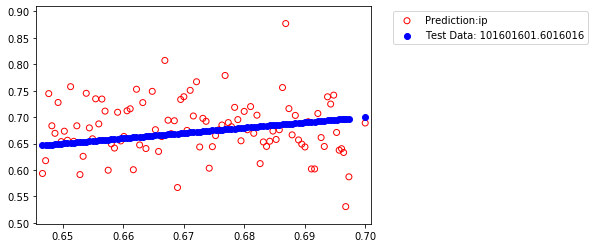

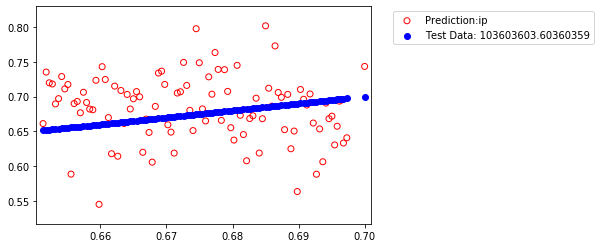

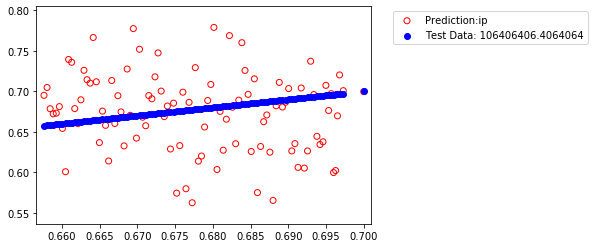

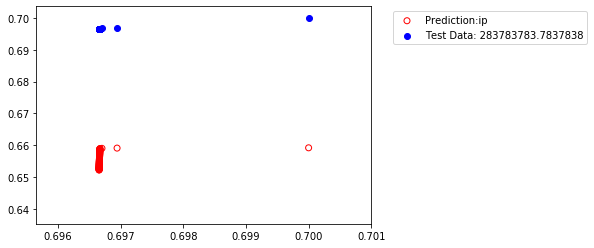

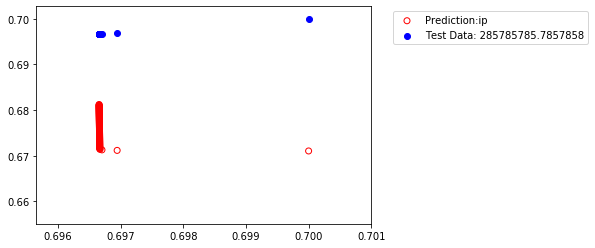

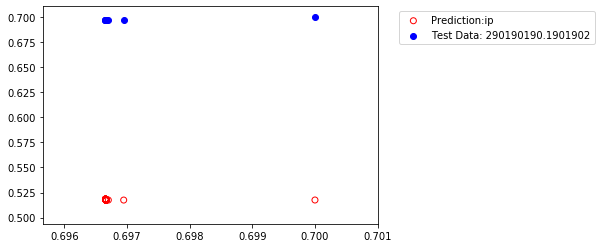

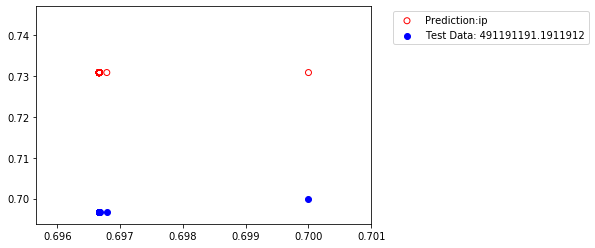

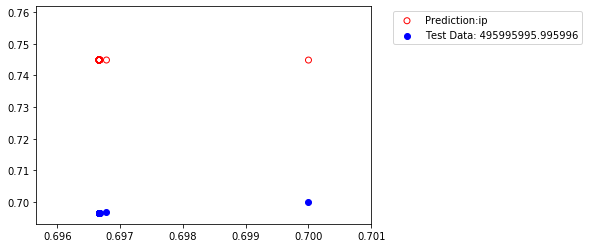

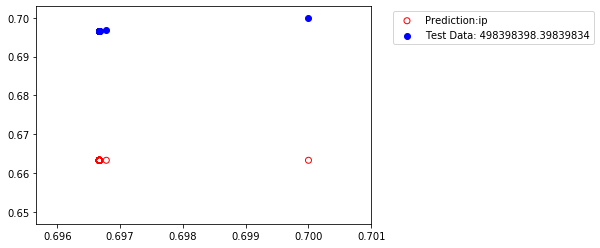

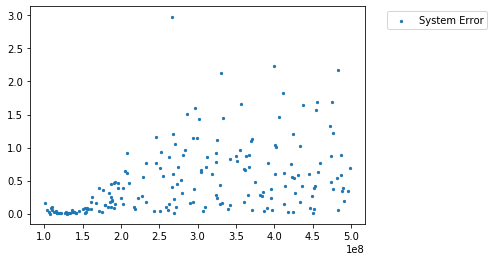

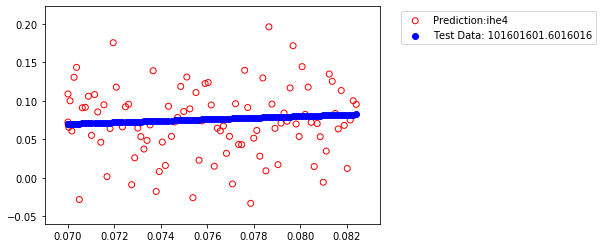

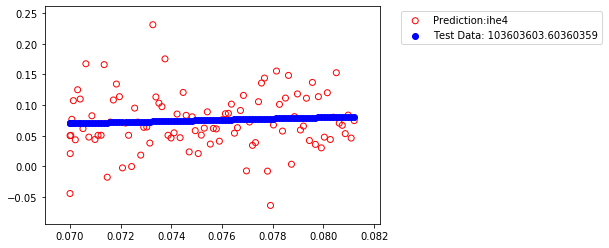

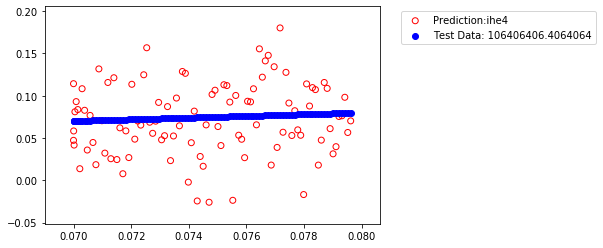

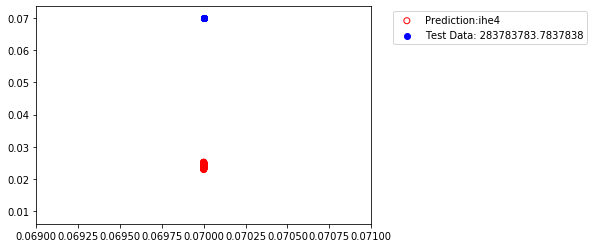

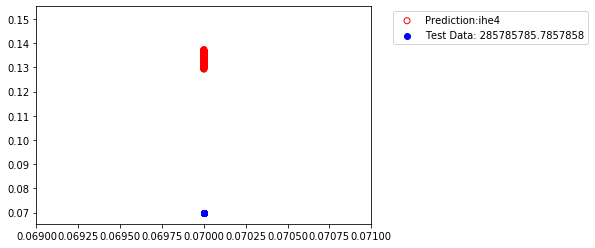

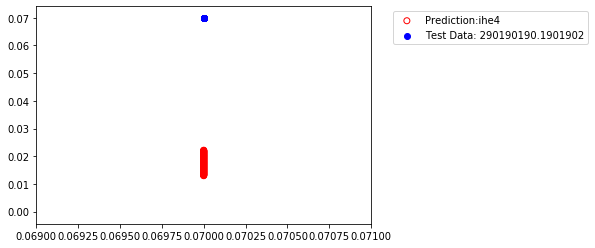

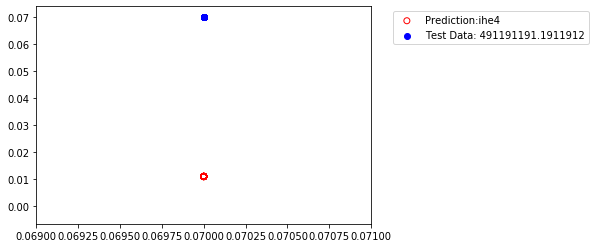

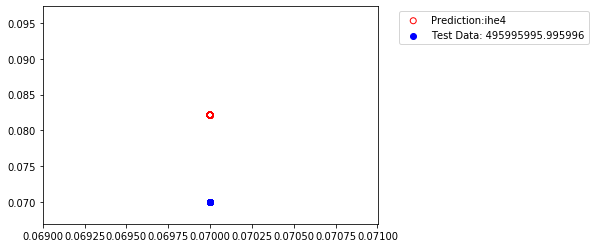

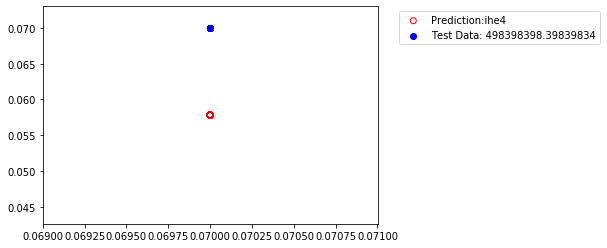

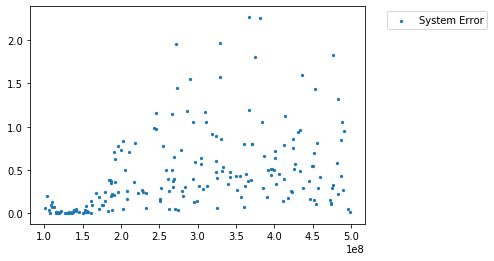

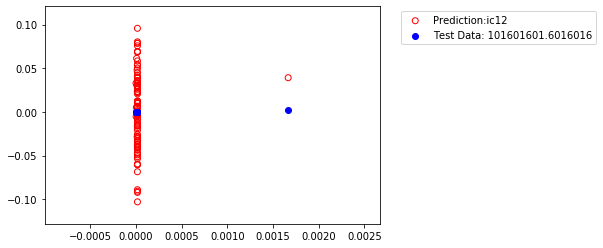

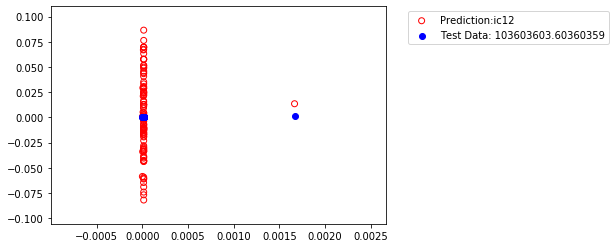

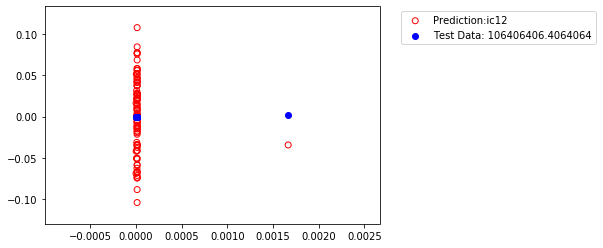

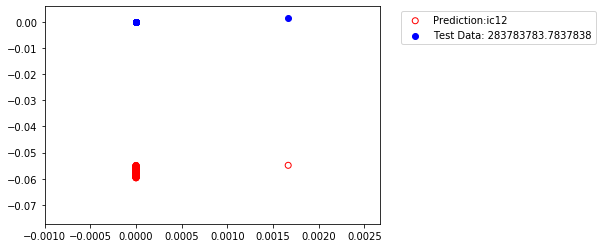

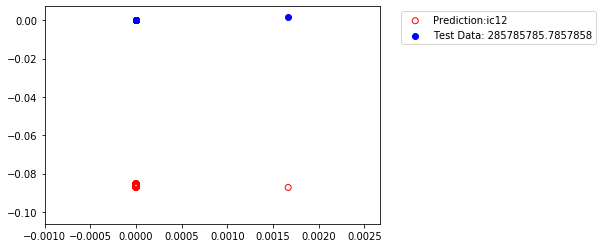

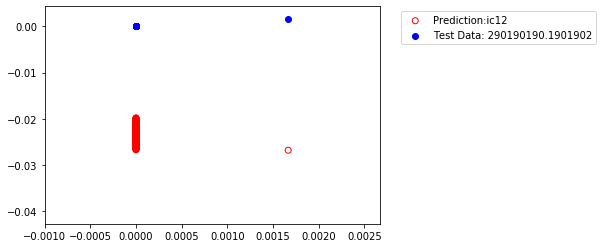

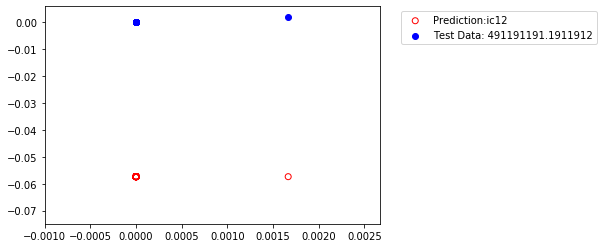

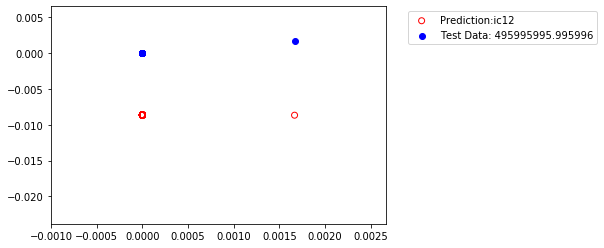

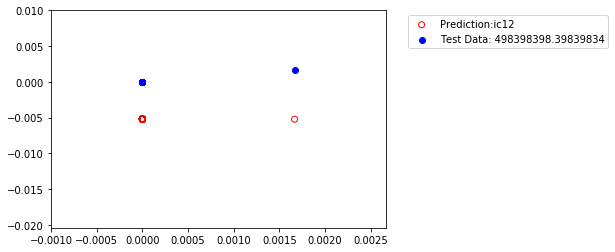

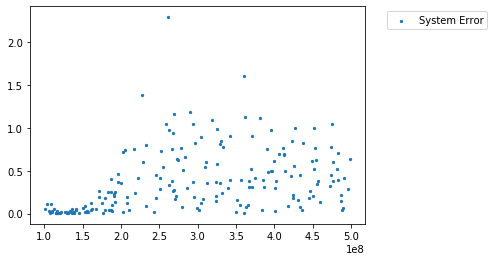

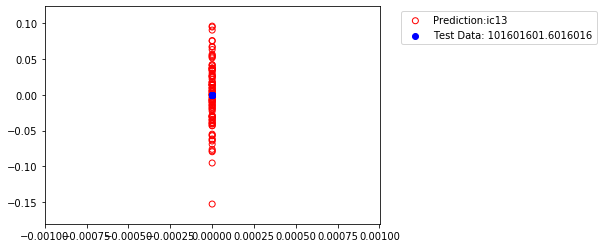

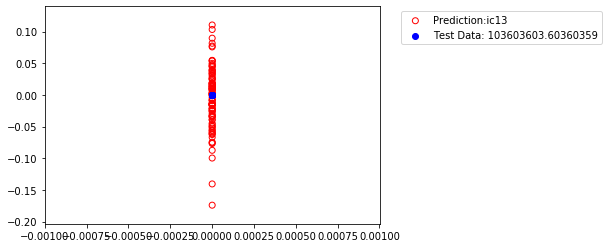

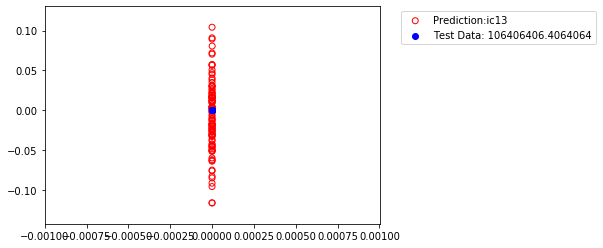

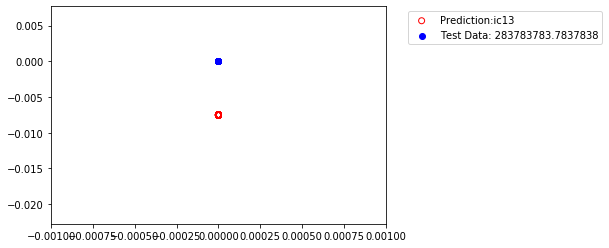

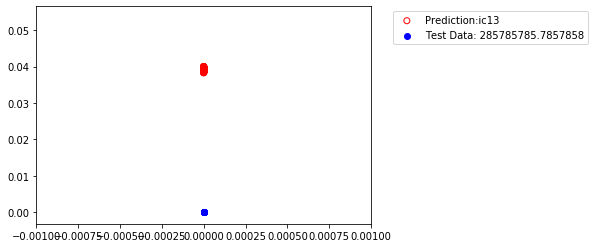

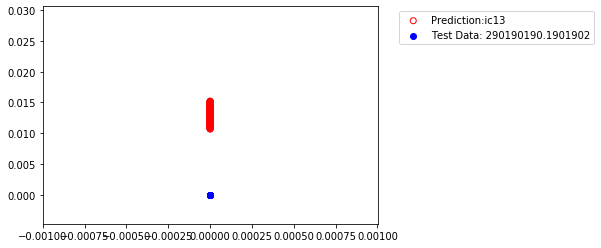

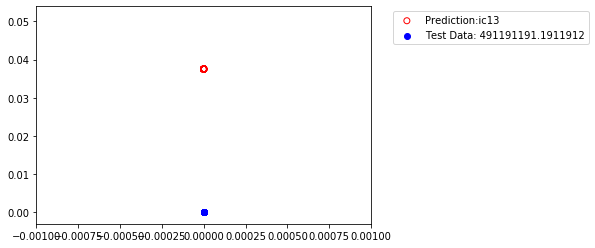

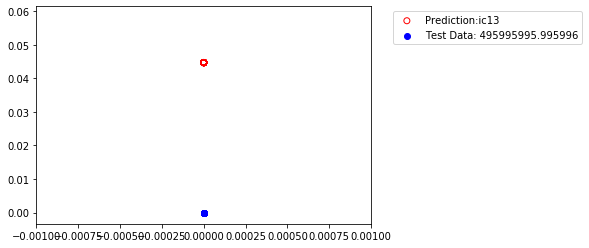

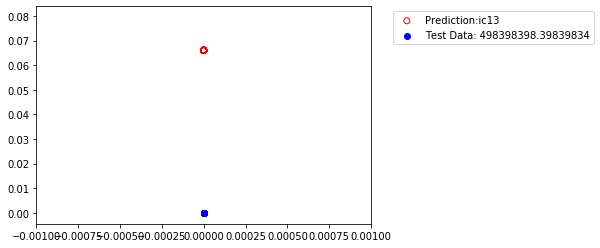

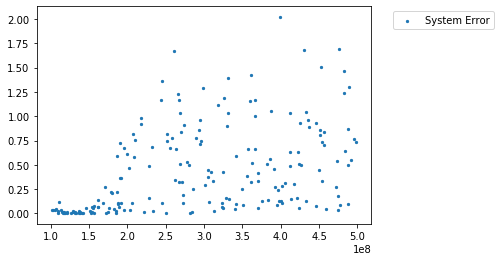

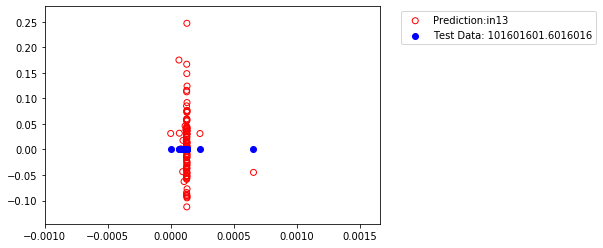

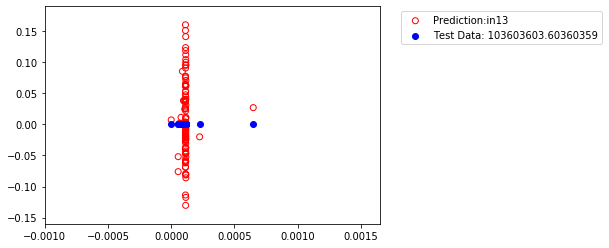

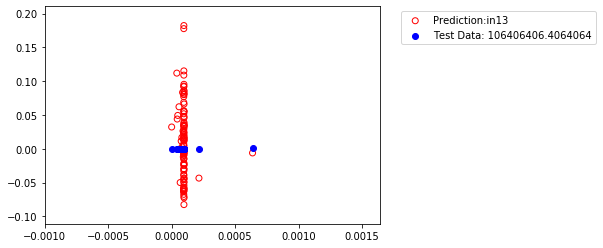

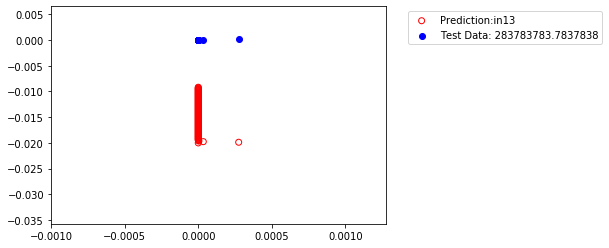

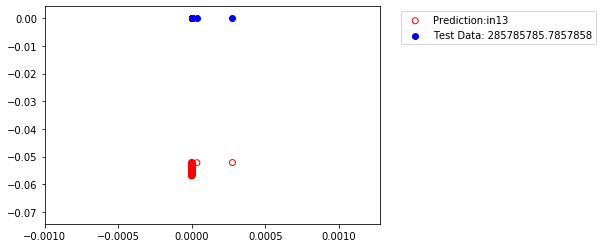

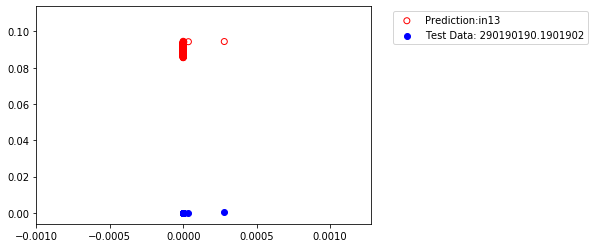

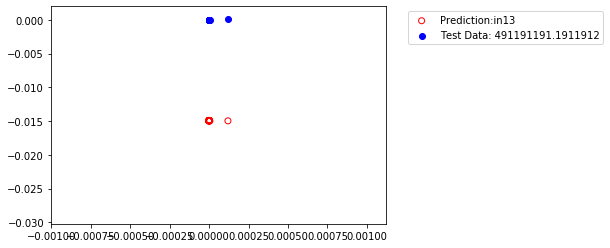

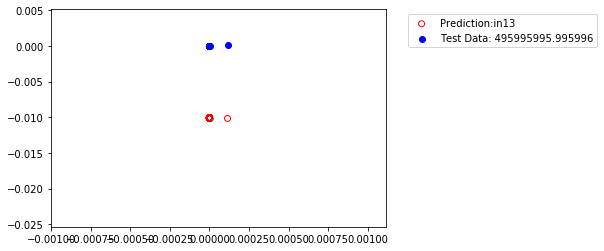

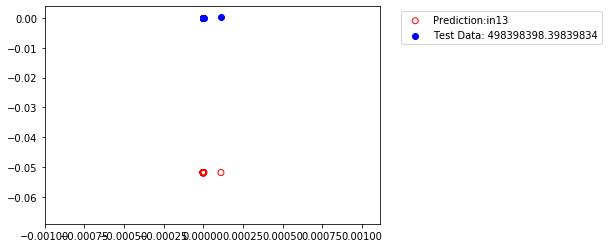

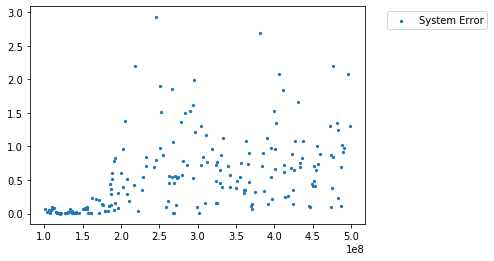

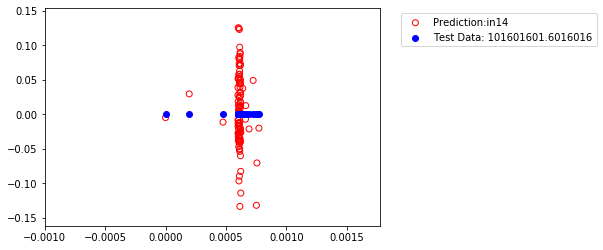

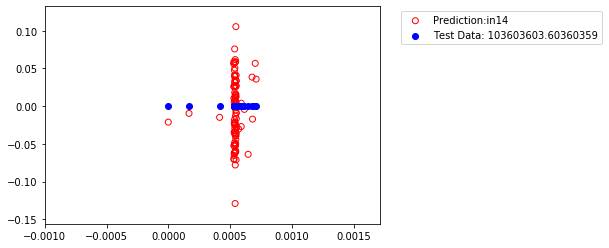

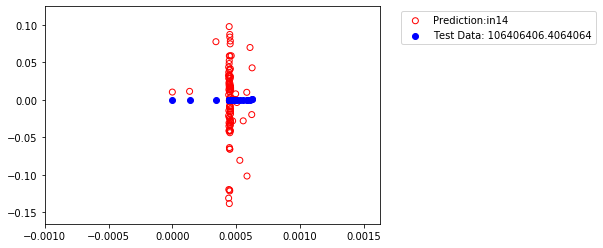

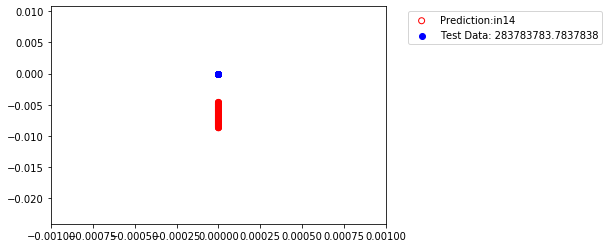

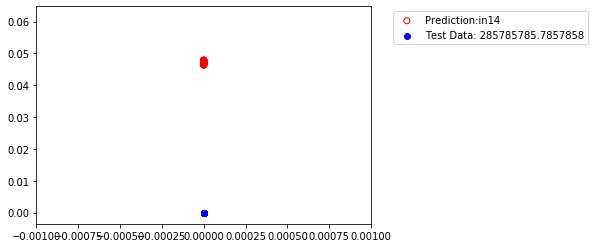

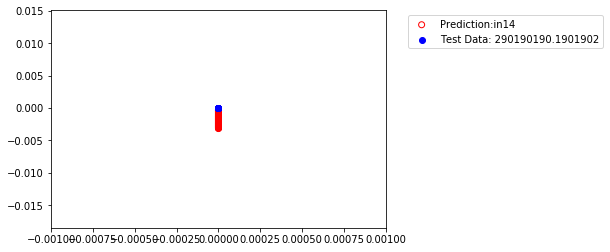

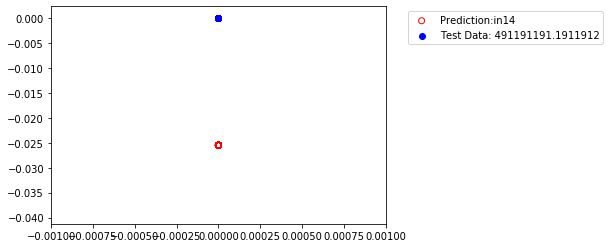

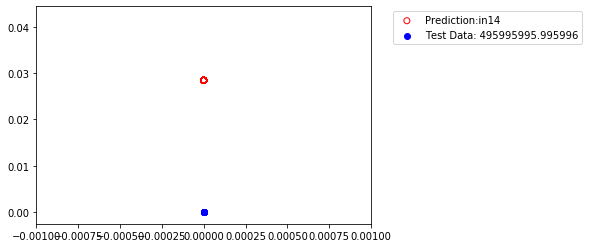

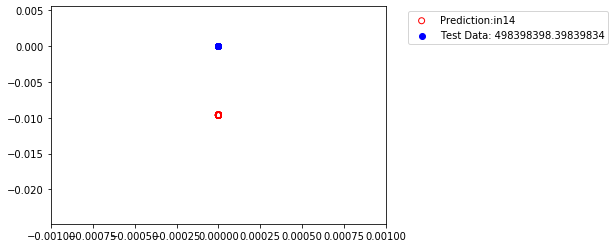

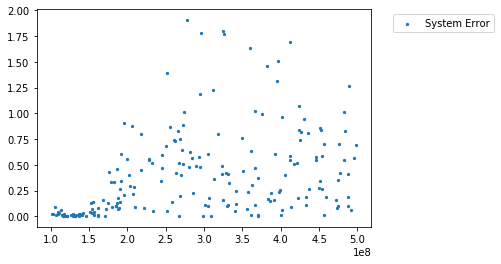

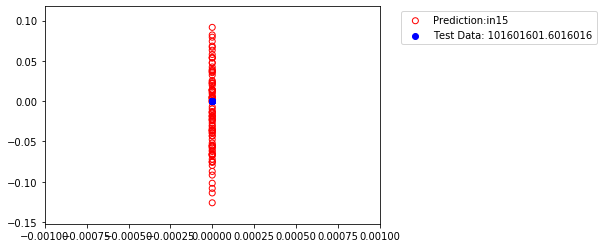

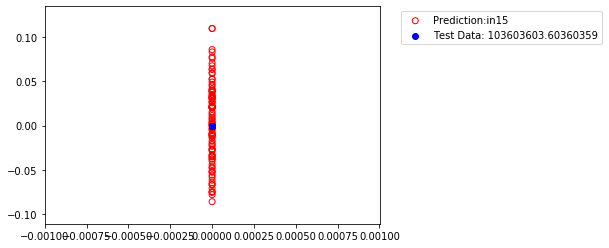

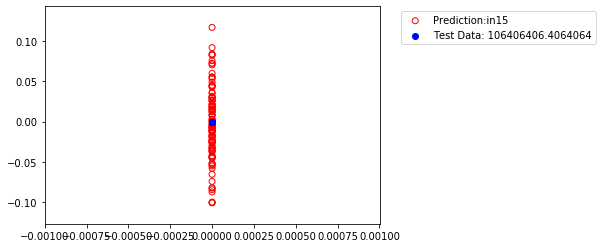

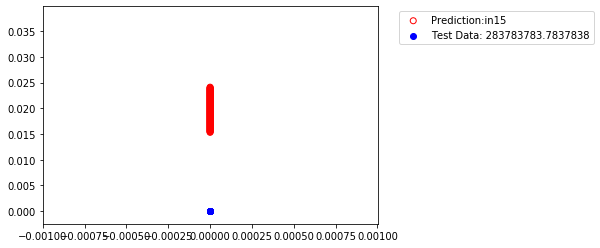

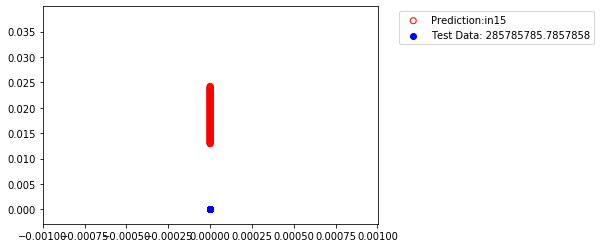

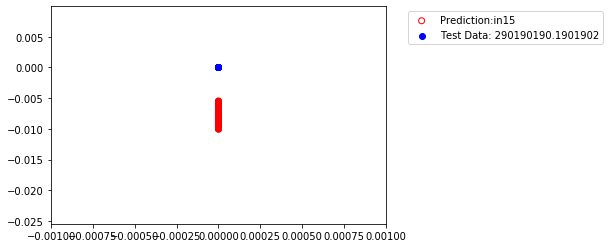

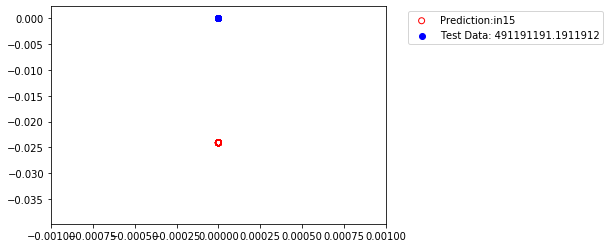

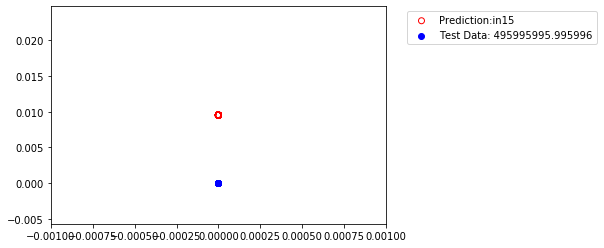

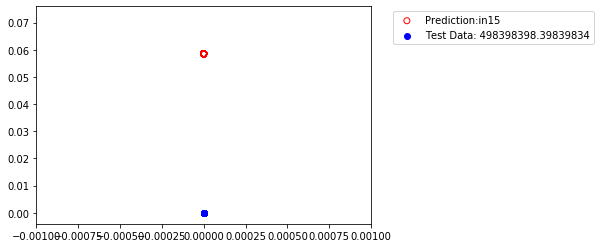

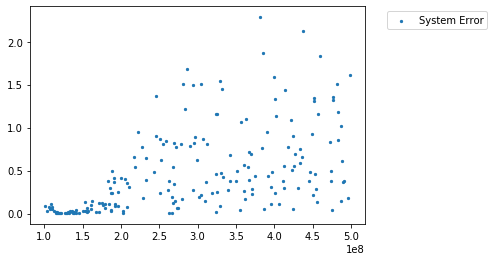

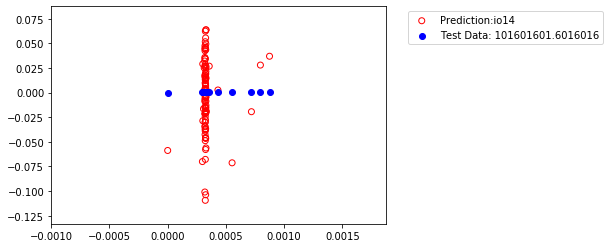

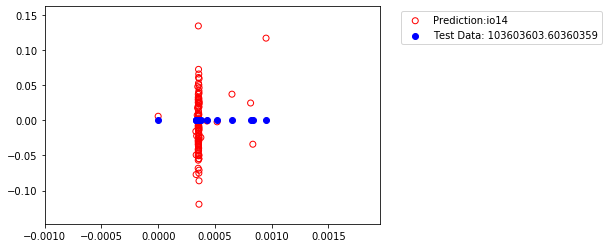

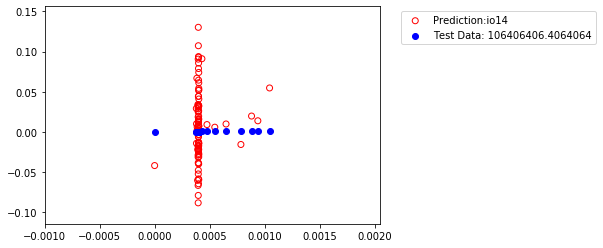

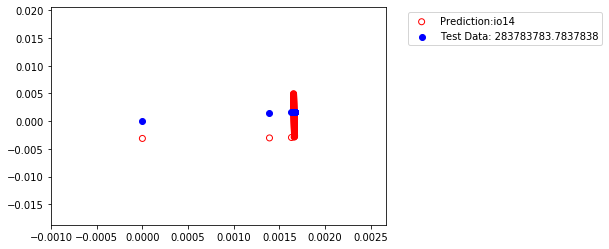

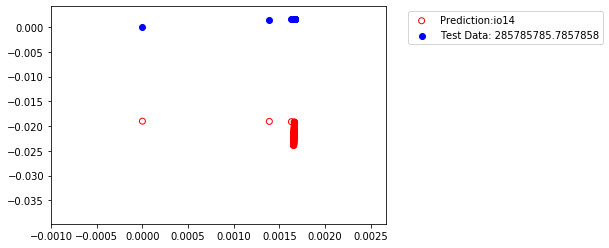

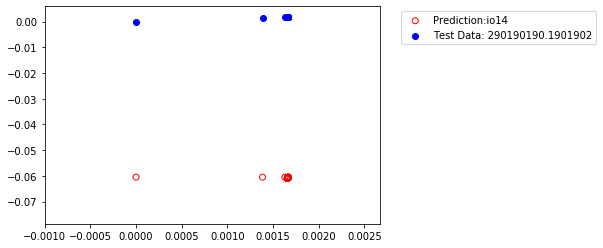

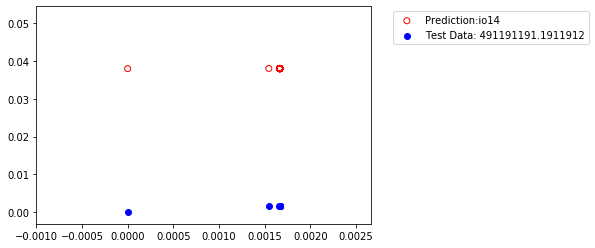

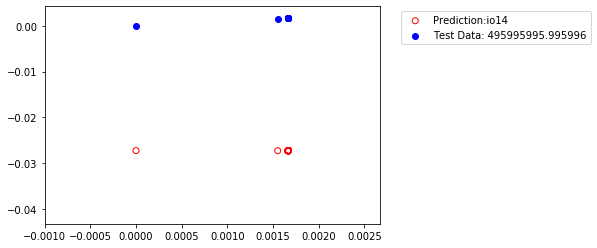

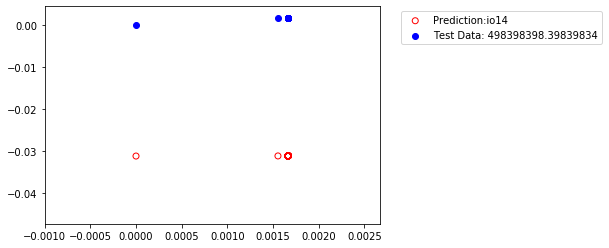

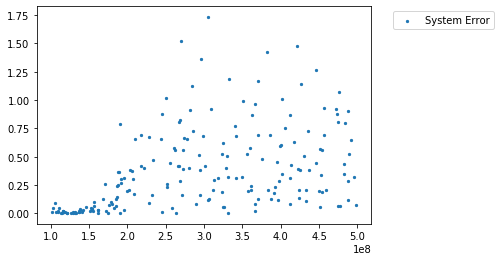

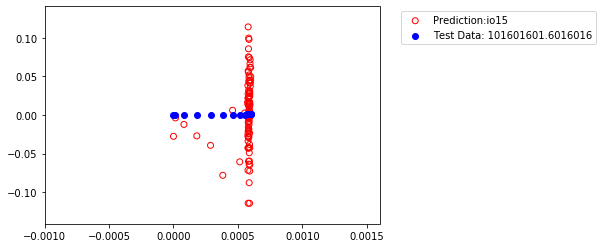

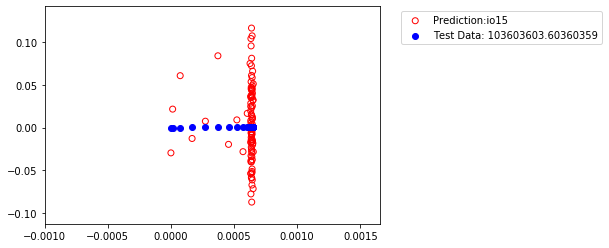

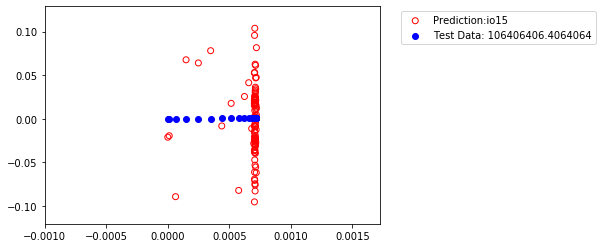

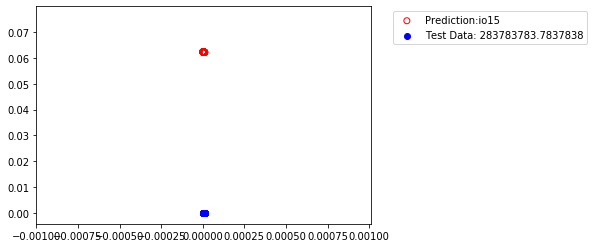

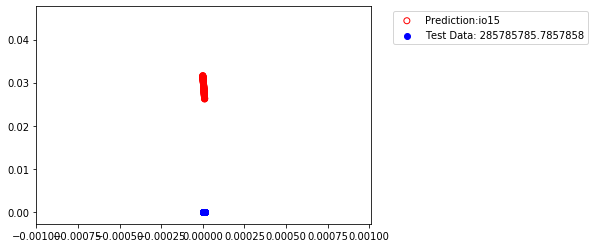

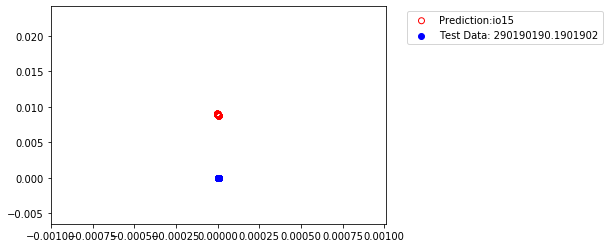

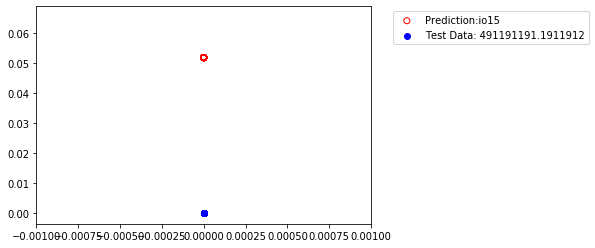

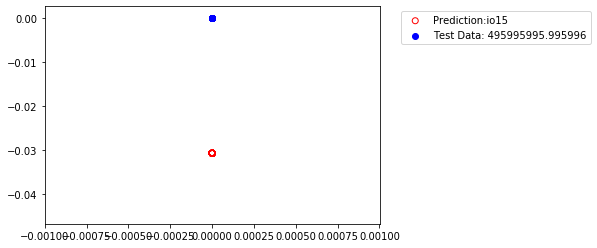

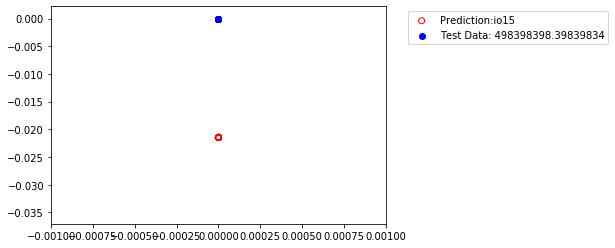

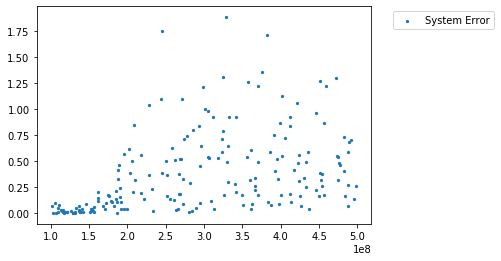

In [67]:
ObservationLength=len(ModelPredictions[0])
XAxis=np.linspace(1,ObservationLength,ObservationLength)
NumberOfTrajectories=int(ObservationLength/(TrajectoryLength-1))
Time=np.split(TestingData.t.values,NumberOfTrajectories)
Epsilon=10**(-3)
for i in range(int(len(ModelPredictions))):
    if i%2==0:
        
        TestDataSplit=np.split(TestingData.iloc[0:ObservationLength,int(i/2)+3].values,NumberOfTrajectories)
        ModelPredictionsSplit=np.split(ModelPredictions[i],NumberOfTrajectories)
        
        for j in range(NumberOfTrajectories):
#         plt.figure()
#         plt.scatter(TestingData.iloc[0:ObservationLength,int(i/2)].values,ModelPredictions[i],color='r',label='Prediction:'+TestingData.keys()[int(i/2)])
            if j==0 or j==1 or j==2 or j==int(NumberOfTrajectories/2)-1 or j==int(NumberOfTrajectories/2) or j==int(NumberOfTrajectories/2)+1\
            or j==NumberOfTrajectories-3 or j==NumberOfTrajectories-2 or j==NumberOfTrajectories-1:
                plt.figure()
                plt.scatter(TestDataSplit[j],ModelPredictionsSplit[j],
                     facecolors='none', edgecolors='r',label='Prediction: '+TestingData.keys()[int(i/2)+3][:-3])
                plt.scatter(TestDataSplit[j],TestDataSplit[j],
                     color='b',label='Test Data T: '+str(TestingData.values[j*(TrajectoryLength-1),-1]))
                plt.xlabel('Test Data :' +TestingData.keys()[int(i/2)+3][:-3])
                plt.xlim((min(TestDataSplit[j])-Epsilon,max(TestDataSplit[j])+Epsilon))
                plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
                plt.figure()
                plt.scatter(Time[j],TestDataSplit[j],color='b',label='Test Data T: '+str(TestingData.values[j*(TrajectoryLength-1),-1]))
                plt.scatter(Time[j],ModelPredictionsSplit[j],facecolors='none', edgecolors='r',label='Prediction: '+TestingData.keys()[int(i/2)+3][:-3])
                plt.xlabel('t')
                plt.ylabel(TestingData.keys()[int(i/2)+3][:-3])
                plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#         print(TestingData.iloc[0:100,int(i/2)])
#         plt.scatter(TestingData.iloc[0:ObservationLength,int(i/2)],TestingData.iloc[0:ObservationLength,int(i/2)].values,color='b', label='Test Data')
#     np.split(ModelPredictions[1][:,0],NumberOfTrajectories)
#         plt.legend()
    else:
#         plt.figure()
#         plt.plot(XAxis,np.abs(ModelPredictions[i][:,0]),'g', label='System Error')
#         plt.legend()
        plt.figure()
        plt.scatter(TestingData['T'].unique()[0:NumberOfTrajectories],np.abs(np.sum(np.split(ModelPredictions[i][:,0],NumberOfTrajectories),axis=1)),s=5,
                   label='System Error')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

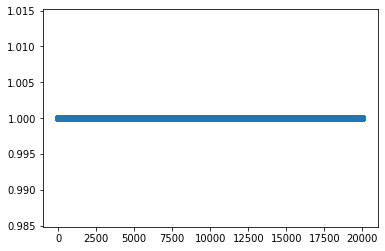

In [68]:
plt.scatter(XAxis,(TestingData.drop(['t','rho','T'],axis=1)*AMU).sum(axis=1).values[0:ObservationLength])

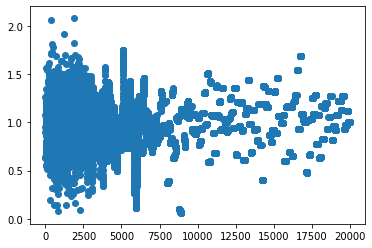

In [69]:
MassConservation=np.zeros((len(ModelPredictions[0]),1))
for i in range(len(ModelPredictions)):
    if i%2==0:
        MassConservation+=ModelPredictions[i]*AMU[int(i/2)]
        
plt.scatter(XAxis,MassConservation)

In [30]:
np.delete(TestingData.values,-2,1)[:,-2]

array([0.00000000e+00, 2.19717916e+01, 4.39435832e+01, ...,
       2.64602880e-03, 2.67330744e-03, 2.70058609e-03])

In [40]:
TestingData.drop('t',axis=1).values

array([[ 7.00000000e-01,  7.00000000e-02,  1.66666667e-03, ...,
         0.00000000e+00,  1.00000000e+04,  1.01601602e+08],
       [ 6.97807500e-01,  7.00000634e-02,  2.52715629e-05, ...,
         2.27767206e-06,  1.00000000e+04,  1.01601602e+08],
       [ 6.97307100e-01,  7.00009263e-02,  6.89571091e-07, ...,
         1.54554377e-05,  1.00000000e+04,  1.01601602e+08],
       ...,
       [ 6.96666623e-01,  7.00000000e-02, -4.75197235e-11, ...,
         4.32934200e-08,  1.00000000e+04,  4.99199199e+08],
       [ 6.96666623e-01,  7.00000000e-02, -4.04512047e-11, ...,
         4.37450244e-08,  1.00000000e+04,  4.99199199e+08],
       [ 6.96666622e-01,  7.00000000e-02, -2.85434404e-11, ...,
         4.41966285e-08,  1.00000000e+04,  4.99199199e+08]])

In [31]:
np.shape(TestingData.values)

(20000, 12)

In [32]:
np.shape(np.delete(TestingData.values,-2,1))

(20000, 11)

In [ ]:
np.shape(np.reshape(TrainingSpeciest.values, (-1,1)))

In [ ]:
reshape

In [ ]:
cno.Tfactors(TrainingSpecies.values[:,-1])

In [ ]:
Tf=cno.Tfactors(1.e9)

In [ ]:
lambda_p_c12__n13 = cno.p_c12__n13(Tf)
lambda_p_c13__n14 = cno.p_c13__n14(Tf)
lambda_n13__c13__weak__wc12 = cno.n13__c13__weak__wc12(Tf)
lambda_p_n13__o14 = cno.p_n13__o14(Tf)
lambda_p_n14__o15 = cno.p_n14__o15(Tf)
lambda_p_n15__he4_c12 = cno.p_n15__he4_c12(Tf)
lambda_o14__n14__weak__wc12 = cno.o14__n14__weak__wc12(Tf)
lambda_o15__n15__weak__wc12 = cno.o15__n15__weak__wc12(Tf)

In [ ]:
type(lambda_n13__c13__weak__wc12)

In [ ]:
TrainingSpecies.values[:,-1]

In [ ]:
Weights,Biases = initialize_NN(np.array([12,20,20,20,20,9]).astype('int64'))

In [ ]:
tf.math.exp(  -6.7601).dtype

In [ ]:
tf.cast(tf.math.exp(  -6.7601),tf.float64).dtype

In [ ]:
tf.as_dtype

In [ ]:
print(Weights[0])

In [ ]:
np.shape(Data.iloc[0].values.reshape(1,-1))

In [ ]:
XSpecies=neural_net(Data.iloc[0].values.reshape(1,-1),Weights,Biases)
XSpecies

In [ ]:
XSpecies[:,1:14]

In [ ]:
ActualSpecies.values

In [ ]:
np.shape(ActualSpecies.values[:,0])

In [ ]:
np.shape(TrainingSpecies.values)

In [ ]:
help(tf)

In [ ]:
This = TrainingSpecies.values

In [ ]:
tf.Variable

In [ ]:
tf.keras.optimizers.SGD

In [36]:
TrainingSpecies.values[:,0:3]

array([[7.00000000e-01, 7.00000000e-02, 1.66666667e-03],
       [6.97811516e-01, 7.00000828e-02, 2.52817605e-05],
       [6.97310434e-01, 7.00011987e-02, 7.78171434e-07],
       ...,
       [6.87784278e-01, 7.20064391e-02, 6.22657965e-06],
       [6.87681514e-01, 7.20321346e-02, 6.22730938e-06],
       [6.87578753e-01, 7.20578298e-02, 6.22814221e-06]])

In [44]:
TestingData.iloc[0:3,:].values

array([[7.00000000e-01, 7.00000000e-02, 1.66666667e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+04, 1.01201201e+08],
       [6.97808547e-01, 7.00000677e-02, 2.52734952e-05, 1.98525203e-06,
        1.09196277e-03, 6.39279035e-05, 2.24078003e-11, 4.81173557e-04,
        2.34367160e-06, 2.03847254e+01, 1.00000000e+04, 1.01201201e+08],
       [6.97308024e-01, 7.00009876e-02, 7.09569058e-07, 1.21041507e-06,
        6.58535543e-04, 2.02382568e-04, 1.97240392e-10, 7.87970907e-04,
        1.58574668e-05, 4.07694508e+01, 1.00000000e+04, 1.01201201e+08]])

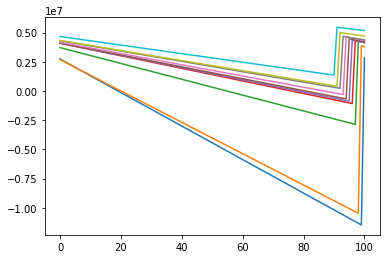

In [35]:
plt.plot(np.split(ModelPredictions[1][:,0],10)))

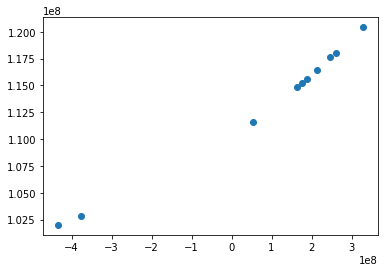

In [45]:
plt.scatter(np.sum(np.split(ModelPredictions[1][:,0],10),axis=1),TestingData.iloc[0:1000]['T'].unique())

In [39]:
len(TestingData.iloc[0:1010]['T'].unique())

11

20000